📌 Tarefa:

Modifique o código para testar graus diferentes (4, 6, 10, 15) na regressão polinomial.
Plote os resultados e compare com o modelo de grau 3.
Qual é o impacto no overfitting e underfitting?

📌 Perguntas para reflexão:

O modelo de grau muito alto melhora ou piora a generalização?

Existe um grau ideal? Como podemos escolher o melhor grau?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


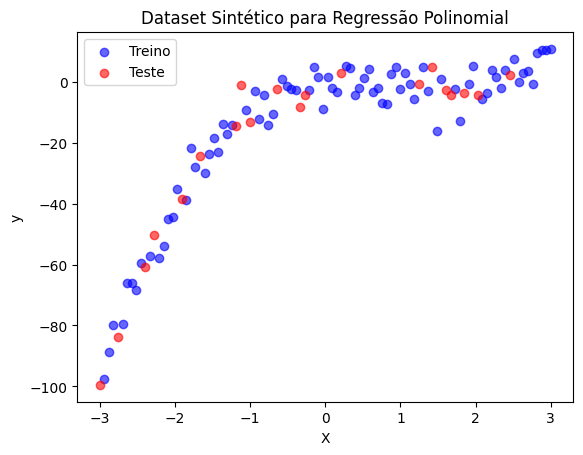

In [2]:
# Gerando um dataset sintético com uma relação polinomial
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Valores entre -3 e 3
y = 2*X**3 - 5*X**2 + X + np.random.normal(0, 5, size=(100, 1))  # Relação cúbica com ruído

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizando os dados
plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Treino")
plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Teste")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dataset Sintético para Regressão Polinomial")
plt.legend()
plt.show()


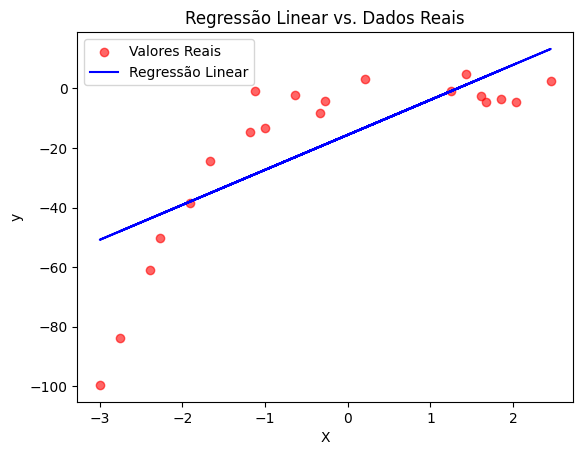

In [3]:
# Criando e treinando um modelo de regressão linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)

# Visualizando os resultados
plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Valores Reais")
plt.plot(X_test, y_pred_linear, color="blue", label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regressão Linear vs. Dados Reais")
plt.legend()
plt.show()


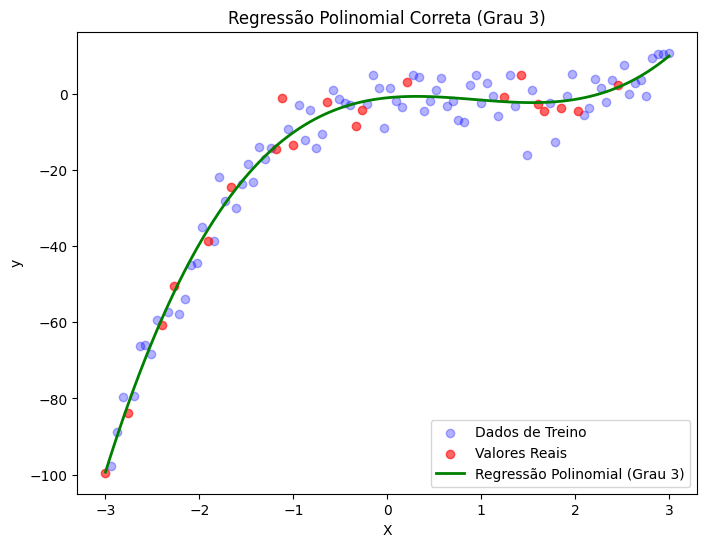

In [13]:
# Criando um modelo de regressão polinomial de grau 3
modelo_polinomial = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# Treinando o modelo com os dados de treino
modelo_polinomial.fit(X_train, y_train)

# Criando um conjunto de valores ordenados para prever (evita linhas quebradas)
X_intervalo = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Fazendo previsões para o intervalo contínuo de X
y_pred_polinomial = modelo_polinomial.predict(X_intervalo)

# Visualizando os resultados corretamente
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="blue", alpha=0.3, label="Dados de Treino")
plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Valores Reais")
plt.plot(X_intervalo, y_pred_polinomial, color="green", linewidth=2, label="Regressão Polinomial (Grau 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regressão Polinomial Correta (Grau 3)")
plt.legend()
plt.show()


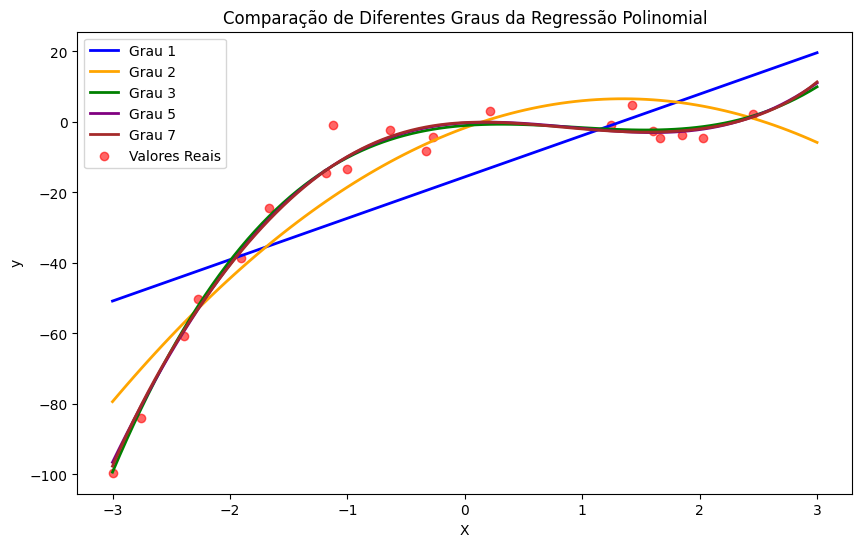

In [14]:
plt.figure(figsize=(10, 6))

# Criando um conjunto de valores ordenados para prever (evita linhas quebradas)
X_intervalo = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Testando diferentes graus de polinômio e plotando corretamente
cores = ["blue", "orange", "green", "purple", "brown"]
graus = [1, 2, 3, 5, 7]

for i, grau in enumerate(graus):
    modelo = make_pipeline(PolynomialFeatures(degree=grau), LinearRegression())
    modelo.fit(X_train, y_train)
    
    # Fazendo previsões para o intervalo contínuo de X
    y_pred = modelo.predict(X_intervalo)

    # Plotando a curva ajustada para cada grau
    plt.plot(X_intervalo, y_pred, color=cores[i], linewidth=2, label=f"Grau {grau}")

# Adicionando os dados reais
plt.scatter(X_test, y_test, color="red", alpha=0.6, label="Valores Reais")

# Ajustando rótulos e título
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparação de Diferentes Graus da Regressão Polinomial")
plt.legend()
plt.show()


🔹 Exercício: Aplicando Reg. Polinomial em um Novo Dataset (Avançado)
Objetivo: Aplicar a Regressão Polinomial em um novo conjunto de dados real.

📌 Tarefa:

Carregue um dataset real do sklearn (California Housing).
Escolha uma variável e aplique Regressão Polinomial.
Teste diferentes graus e encontre o melhor ajuste.

📌 Dica para carregar o dataset:



In [20]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["PRICE"] = data.target  # Variável alvo

X = ?  # Exemplo: MedInc (Renda Média)
y = ?


SyntaxError: invalid syntax (812698622.py, line 7)

In [19]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
